# Working With Missing Values

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

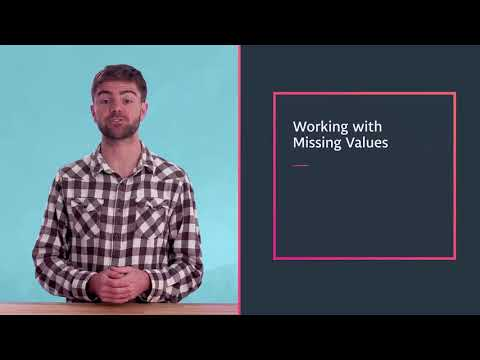

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/mbAgYicmzqE'))

There are two main 'pain' points for passing data to machine learning models in sklearn:

1. Missing values
2. Categorical values

Sklearn does not know how you want to treat missing values or categorical variables, and there are lots of methods for working with each. For this lesson, we will look at common, quick fixes. These methods help you get your models into production quickly, but the thoughtful treatment of missing values and categorical variables should be done to remove bias and improve predictions over time.

Three strategies for working with missing values include:

1. We can remove (or “drop”) the rows or columns holding the missing values.
2. We can impute the missing values.
3. We can build models that work around them, and only use the information provided.

## Removing Data - Why Not?

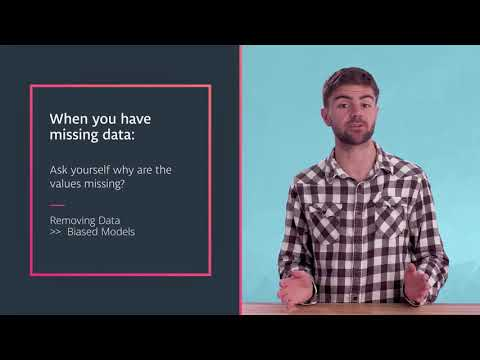

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/w3-5Z5mEzTM'))

Though dropping rows and/or columns holding missing values is quite easy to do using NumPy and pandas, it is often not appropriate.

Understanding why the data is missing is important before dropping these rows and columns. In this video, you saw a number of situations in which dropping values was not a good idea. These included

1. Dropping data values associated with the effort or time an individual put into a survey.
2. Dropping data values associated with sensitive information.

In either of these cases, the missing values hold information. A quick removal of the rows or columns associated with these missing values would remove missing data that could be used to better inform models.

Instead of removing these values, we might keep track of the missing values using indicator values, or counts associated with how many questions an individual skipped.

## Removing Data - When Is It OK?

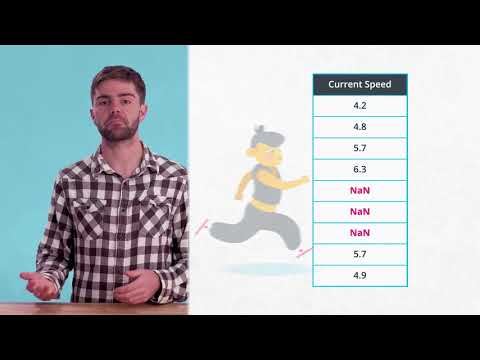

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/oQhIPq5AccU'))

In the last video, you saw cases in which dropping rows or columns associated with missing values would not be a good idea. There are other cases in which dropping rows or columns associated with missing values would be okay.

A few instances in which dropping a row might be okay are:

1. Dropping missing data associated with mechanical failures.
2. The missing data is in a column that you are interested in predicting.

Other cases when you should consider dropping data that are not associated with missing data:

1. Dropping columns with no variability in the data.
2. Dropping data associated with information that you know is not correct.

In handling removing data, you should think more about why is this missing or why is this data incorrectly input to see if an alternative solution might be used than dropping the values.

## Removing Data - Other Considerations

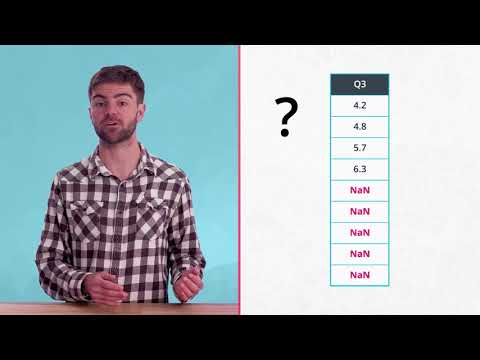

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/xrXk_Tvi0oQ'))

One common strategy for working with missing data is to understand the proportion of a column that is missing. If a large proportion of a column is missing data, this is a reason to consider dropping it.

There are easy ways using pandas to create dummy variables to track the missing values, so you can see if these missing values actually hold information (regardless of the proportion that are missing) before choosing to remove a full column.

#### Removing Values

You have seen:

1. sklearn break when introducing missing values
2. reasons for dropping missing values

It is time to make sure you are comfortable with the methods for dropping missing values in pandas.  You can drop values by row or by column, and you can drop based on whether **any** value is missing in a particular row or column or **all** are values in a row or column are missing.

- A useful set of many resources in pandas is available [here](https://pandas.pydata.org/docs/user_guide/index.html).  
- You can get detailed information about the Pandas drop function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).
- Another resource can be found [here](https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan).

In [6]:
import numpy as np
import pandas as pd
import RemovingValues as t
import matplotlib.pyplot as plt
%matplotlib inline

small_dataset = pd.DataFrame({'col1': [1, 2, np.nan, np.nan, 5, 6], 
                              'col2': [7, 8, np.nan, 10, 11, 12],
                              'col3': [np.nan, 14, np.nan, 16, 17, 18]})

small_dataset

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
2,NaN,NaN,NaN
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


#### Question 1

**1.** Drop any row with a missing value.

In [7]:
all_drop  = small_dataset.dropna()# Drop any row with a missing value


#print result
all_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [8]:
t.all_drop_test(all_drop) #test

Nice job! That looks right!


#### Question 2

**2.** Drop only the row with all missing values.

In [12]:
all_row = small_dataset.dropna(axis=0, how='all')# Drop only rows with all missing values 


#print result
all_row

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [13]:
t.all_row_test(all_row) #test

Nice job! That looks right!


#### Question 3

**3.** Drop only the rows with missing values in column 3.

In [20]:
only3_drop = small_dataset.dropna(subset=['col3'], how='any')# Drop only rows with missing values in column 3


#print result
only3_drop

,col1,col2,col3
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [21]:
t.only3_drop_test(only3_drop) #test

Nice job! That looks right!


#### Question 4

**4.** Drop only the rows with missing values in column 3 or column 1.

In [22]:
only3or1_drop = small_dataset.dropna(subset=['col1', 'col3'], how='any')# Drop rows with missing values in column 1 or column 3


#print result
only3or1_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [23]:
t.only3or1_drop_test(only3or1_drop) #test

Nice job! That looks right!
